#### Developed a machine learning model to classify various types of erythematosquamous diseases using the Dermatology dataset. Implemented feature engineering, data preprocessing, and multi-class classification algorithms to accurately predict disease types, contributing to early and effective diagnosis.

Importing necessary libraries for data processing, model building, and evaluation.

In [2]:
import tensorflow as tf
import keras as ke
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.metrics as skm 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
import seaborn as sns 
import os, random

Loading the dermatology dataset and handling missing values. The dataset is split into features (X) and target labels (y). We also perform train-test splits to create training, validation, and test sets, with stratification to maintain class distribution.

In [3]:
dermatoDataset = pd.read_csv("dataset.csv")

dermatoDataset.age.replace("?", 36.0, inplace=True) 

y = np.asarray(dermatoDataset["class"].values)
X = np.asarray(dermatoDataset.drop("class", axis=1).values.astype(float))

X_train = tf.cast(X, dtype=tf.float32)

X2, X_test, y2, y_test = train_test_split(X, y, test_size=0.1,random_state=20,shuffle=True,stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=20,shuffle=True,stratify=y)


Analysing Content:

In [4]:
print('treino x:',np.shape(X_train))
print('treio y:',np.shape(y_train))
pd.DataFrame(y_val).value_counts()

treino x: (292, 34)
treio y: (292,)


1    23
3    15
2    12
4    10
5    10
6     4
Name: count, dtype: int64

Creating Model:

In [8]:
model = ke.Sequential()
model.add(ke.layers.Dropout(0.2))
model.add(ke.layers.BatchNormalization())
model.add(ke.layers.Dense(20, activation='relu'))
model.add(ke.layers.Dense(13, activation='relu'))
model.add(ke.layers.Dense(9, activation='relu'))
model.add(ke.layers.Dense(7, activation='softmax'))

model.build(input_shape=(None, X_train.shape[1]))  # Build the model with input shape

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_2 (Dropout)             │ (None, 34)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34)             │           136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 20)             │           700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 13)             │           273 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 9)              │           126 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │            70 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,305 (5.10 KB)

 Trainable params: 1,237 (4.83 KB)

 Non-trainable params: 68 (272.00 B)

Compiling and Training

In [9]:
opt = tf.optimizers.Adam(learning_rate=1e-4)

In [10]:
model.compile(optimizer='Adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [11]:
# defining inicialization 
i=543
os.environ['PYTHONHASHSEED']=str(i)
tf.random.set_seed(i)
np.random.seed(i)
random.seed(i)
    
history=model.fit(x=X_train, y=y_train,
          epochs=275,
          batch_size=700,
          validation_data=(X_val,y_val))

Epoch 1/275
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0856 - loss: 2.1263 - val_accuracy: 0.2027 - val_loss: 2.0121
Epoch 2/275
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.0753 - loss: 2.1215 - val_accuracy: 0.1622 - val_loss: 2.0139
Epoch 3/275
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0788 - loss: 2.0997 - val_accuracy: 0.1486 - val_loss: 2.0125
Epoch 4/275
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.0890 - loss: 2.0656 - val_accuracy: 0.1351 - val_loss: 2.0125
Epoch 5/275
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.0925 - loss: 2.0581 - val_accuracy: 0.1351 - val_loss: 2.0093
Epoch 6/275
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.0993 - loss: 2.0515 - val_accuracy: 0.1216 - val_loss: 2.0038
Epoch 7/275
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.0959 - loss: 2.0402 - val_accuracy: 0.1351 - val_loss: 1.9975
Epoch 8/275
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.0993 - loss: 2.0196 - val_accuracy: 0.1216 - val_loss: 1

Plotting LOSS Curve:

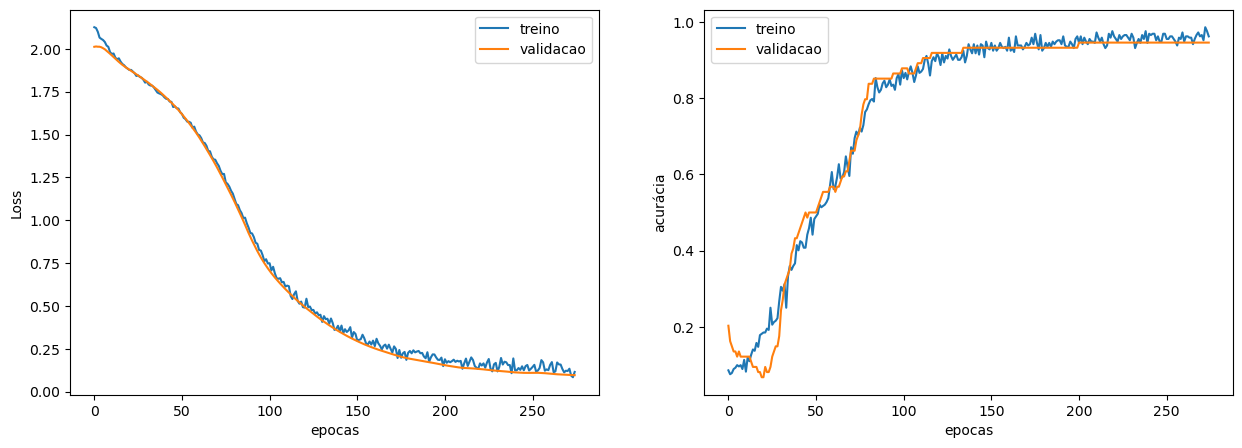

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="treino")
plt.plot(history.history["val_loss"], label="validacao")
plt.xlabel("epocas")
plt.ylabel("Loss")
plt.legend();
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="treino")
plt.plot(history.history["val_accuracy"], label="validacao")
plt.xlabel("epocas")
plt.ylabel("acurácia")

plt.legend();

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


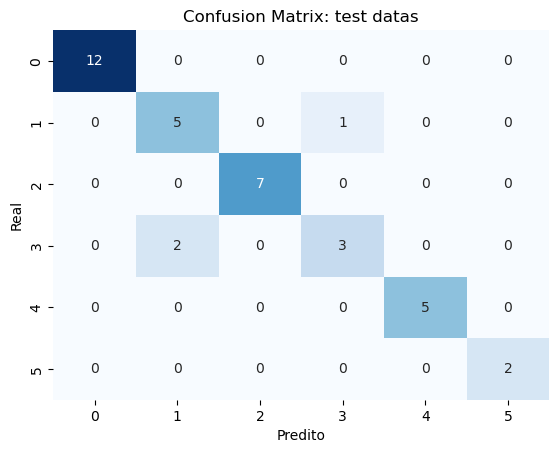

In [13]:
Y_pred_prob = model.predict(X_test)
Y_pred = np.argmax(Y_pred_prob,axis=1) 
cmat=skm.confusion_matrix(y_test,Y_pred)
cm_df = pd.DataFrame(cmat) 
    
ax= plt.subplot()
sns.heatmap(cm_df,annot=True, cmap='Blues',fmt="d",cbar=False)

ax.set_xlabel('Predito');ax.set_ylabel('Real'); 
ax.set_title('Confusion Matrix: test datas');

Metrics:

In [14]:
acuracia=np.sum(np.diag(cmat))*100/np.sum(cmat)
sensibilidade=cmat[1,1]/(cmat[0,1]+cmat[1,1])*100
especificidade=cmat[0,0]/(cmat[1,0]+cmat[0,0])*100

print('acuracia',acuracia,"%")
print('sensibilidad',sensibilidade,"%")
print('especificidade',especificidade,"%")

acuracia 91.89189189189189 %
sensibilidad 100.0 %
especificidade 100.0 %


ROC Curve:

ROC AUC score: 0.9447972670250896


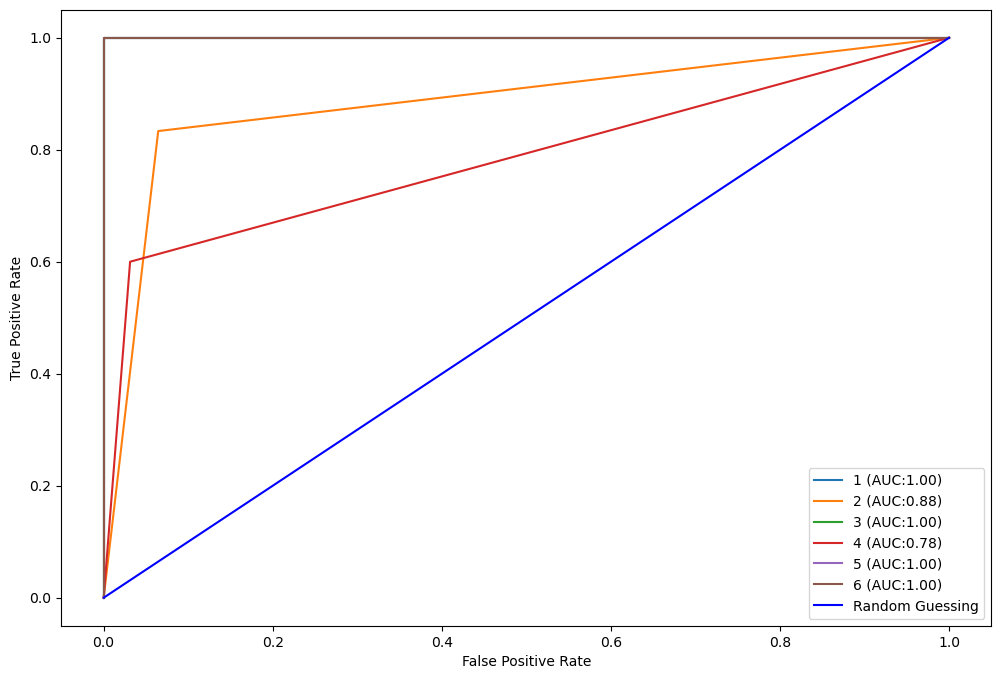

In [15]:
target= [1, 2, 3, 4, 5, 6]

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test, Y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()